In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [57]:
df=pd.read_excel('covid-nepal.xlsx')

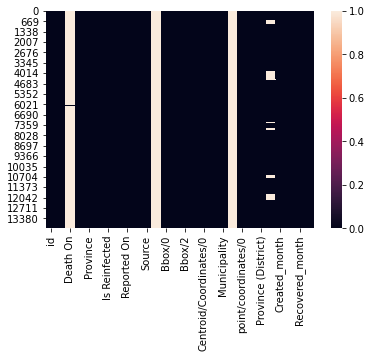

In [514]:
sns.heatmap(df.isnull())

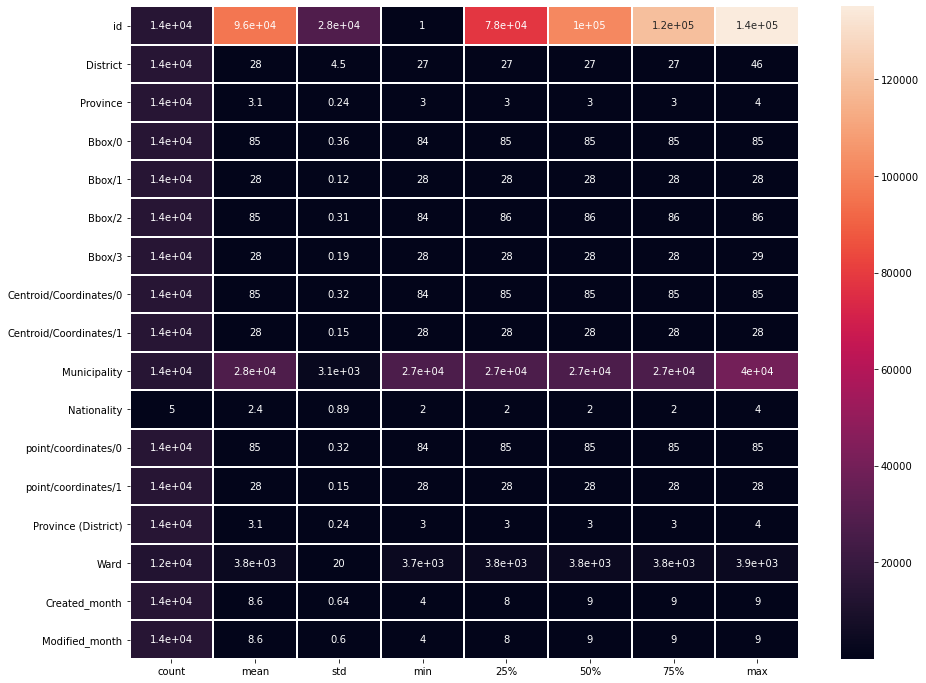

In [526]:
pl.figure(figsize=(15,12))
sns.heatmap(df.describe().T,annot=True,
           linewidth=1,
           edgecolor='w')


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14031 entries, 0 to 14030
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      14031 non-null  int64         
 1   Current State           14031 non-null  object        
 2   Death On                83 non-null     datetime64[ns]
 3   District                14031 non-null  int64         
 4   Province                14031 non-null  int64         
 5   Districts               14031 non-null  object        
 6   Is Reinfected           14031 non-null  bool          
 7   Gender                  14029 non-null  object        
 8   Reported On             14031 non-null  datetime64[ns]
 9   Age                     14031 non-null  object        
 10  Source                  14031 non-null  object        
 11  Type                    4 non-null      object        
 12  Bbox/0                  14031 non-null  float6

In [58]:
df.shape

(14031, 27)

In [59]:
df.head()

,id,Created On,Modified On,Recovered On,Current State,Death On,District,Province,Districts,Is Reinfected,...,Bbox/2,Bbox/3,Centroid/Coordinates/0,Centroid/Coordinates/1,Municipality,Nationality,point/coordinates/0,point/coordinates/1,Province (District),Ward
0,1,2020-04-08T12:10:46.924551+05:45,2020-04-29T10:23:24.996211+05:45,2020-01-31,recovered,NaT,27,3,Kathmandu,False,...,85.565844,27.817653,85.347351,27.728201,27006,2.0,85.306941,27.695445,3,3716.0
1,2,2020-04-08T12:10:46.924551+05:45,2020-04-18T15:44:15.656734+05:45,2020-04-18,recovered,NaT,27,3,Kathmandu,False,...,85.565844,27.817653,85.347351,27.728201,27006,2.0,85.303927,27.695357,3,3716.0
2,15,2020-04-14T12:59:03.097377+05:45,2020-05-24T16:45:27.983589+05:45,2020-04-23,active,NaT,27,3,Kathmandu,True,...,85.565844,27.817653,85.347351,27.728201,27005,2.0,85.370910,27.692810,3,3837.0
3,16,2020-04-14T12:59:53.539214+05:45,2020-04-23T16:55:04.611254+05:45,2020-04-23,recovered,NaT,27,3,Kathmandu,False,...,85.565844,27.817653,85.347351,27.728201,27005,2.0,85.371457,27.692974,3,3837.0
4,220,2020-05-12T22:38:57.878594+05:45,2020-05-23T13:12:30.865361+05:45,2020-05-21,recovered,NaT,27,3,Kathmandu,False,...,85.565844,27.817653,85.347351,27.728201,27001,NaN,85.356898,27.734822,3,3809.0


In [60]:
df['Created_month']=pd.DatetimeIndex(df['Created On']).month
df['Modified_month']=pd.DatetimeIndex(df['Modified On']).month
df['Recovered_month']=pd.DatetimeIndex(df['Recovered On']).month

In [62]:
df['Recovered_month'].fillna('NA',inplace=True)

In [64]:
def convert(date):
    if type(date)==float:
        return int(date)
    else:
        return 'Na'
        
df['Recovered_month']=df['Recovered_month'].apply(lambda x: convert(x))

In [68]:
df.drop(['Created On','Modified On','Recovered On'],axis=1,inplace=True)

Index(['id', 'Current State', 'Death On', 'District', 'Province', 'Districts',
       'Is Reinfected', 'Gender', 'Reported On', 'Age', 'Source', 'Type',
       'Bbox/0', 'Bbox/1', 'Bbox/2', 'Bbox/3', 'Centroid/Coordinates/0',
       'Centroid/Coordinates/1', 'Municipality', 'Nationality',
       'point/coordinates/0', 'point/coordinates/1', 'Province (District)',
       'Ward', 'Created_month', 'Modified_month', 'Recovered_month'],
      dtype='object')

In [70]:
df.head()

,id,Current State,Death On,District,Province,Districts,Is Reinfected,Gender,Reported On,Age,...,Centroid/Coordinates/1,Municipality,Nationality,point/coordinates/0,point/coordinates/1,Province (District),Ward,Created_month,Modified_month,Recovered_month
0,1,recovered,NaT,27,3,Kathmandu,False,male,2020-01-24,32.0,...,27.728201,27006,2.0,85.306941,27.695445,3,3716.0,4,4,1
1,2,recovered,NaT,27,3,Kathmandu,False,female,2020-03-23,19.0,...,27.728201,27006,2.0,85.303927,27.695357,3,3716.0,4,4,4
2,15,active,NaT,27,3,Kathmandu,True,male,2020-04-14,58.0,...,27.728201,27005,2.0,85.370910,27.692810,3,3837.0,4,5,4
3,16,recovered,NaT,27,3,Kathmandu,False,female,2020-04-14,81.0,...,27.728201,27005,2.0,85.371457,27.692974,3,3837.0,4,4,4
4,220,recovered,NaT,27,3,Kathmandu,False,female,2020-05-12,33.0,...,27.728201,27001,NaN,85.356898,27.734822,3,3809.0,5,5,5


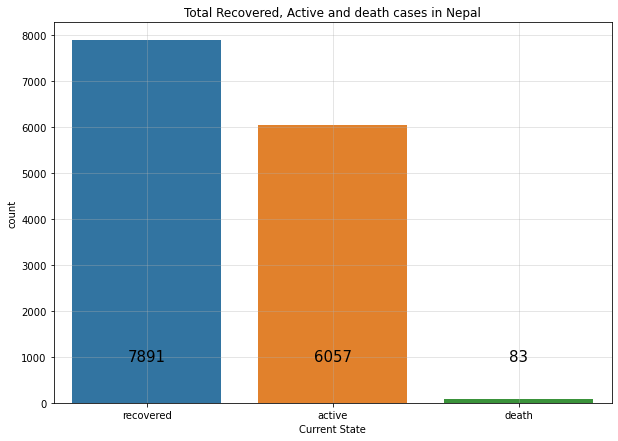

In [166]:
pl.figure(figsize=(10,7))
ax=sns.countplot(df['Current State'])
pl.title('Total Recovered, Active and death cases in Nepal')

for i,j in enumerate(df['Current State'].value_counts().reset_index()['Current State'].values):
    ax.text(i,1000,j,ha='center',va='center',size=15)
pl.grid(alpha=.4)
pl.show()

<IPython.core.display.Javascript object>

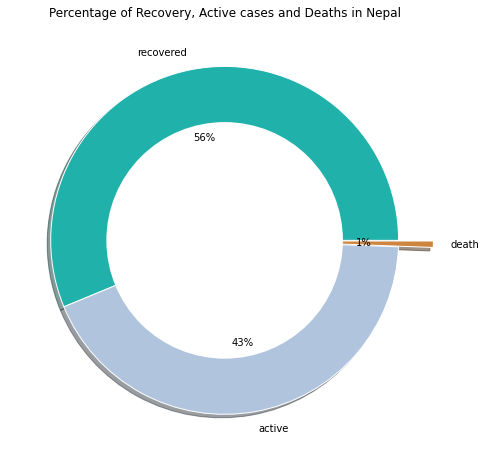

In [146]:
pl.figure(figsize=(10,8))
pl.title('Percentage of Recovery, Active cases and Deaths in Nepal')
pieplot=df['Current State'].value_counts()
pl.pie(pieplot,labels=pieplot.keys(),autopct='%1.0f%%',
       wedgeprops=({'linewidth':1,'edgecolor':'w'}),explode=[0,0,0.2],
       colors=['lightseagreen','lightsteelblue','peru'],shadow=True)
centre_circle = plt.Circle((0,0),0.68,fc='white')
fig = pl.gcf()
fig.gca().add_artist(centre_circle)
pl.show()

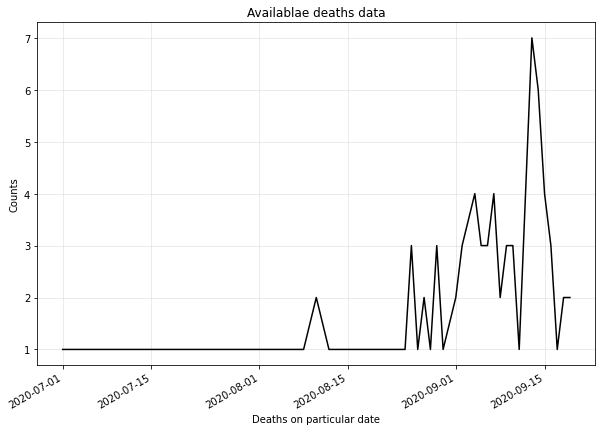

In [165]:
df['Death On'].value_counts().plot(figsize=(10,7),
                                  linestyle='-',
                                  c='k')
pl.grid(alpha=.3)
pl.xlabel('Deaths on particular date')
pl.ylabel('Counts')
pl.title('Availablae deaths data')
pl.show()

Deaths hiked in 2020-09-15

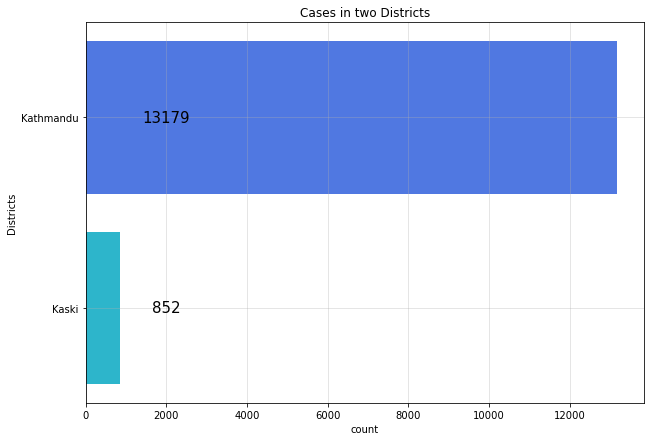

In [189]:
pl.figure(figsize=(10,7))
pl.title('Cases in two Districts')
ax=sns.countplot(y=df['Districts'],
                palette=sns.color_palette('rainbow'))
for i,j in enumerate(df['Districts'].value_counts().reset_index()['Districts'].values):
    ax.text(2000,i,j,ha='center',va='center',size=15)
pl.grid(alpha=.4)
pl.show()

# Age group analysis:

In [214]:
def ageGroup(age):
    if type(age)!=str:
        if age>=0 and age<10:
            return '0-10'
        if age>=10 and age<20:
            return '10-20'
        if age>=20 and age<30:
            return '20-30'
        if age>=30 and age<40:
            return '30-40'
        if age>=40 and age<50:
            return '40-50'
        if age>=50 and age<60:
            return '50-60'
        if age>=60 and age<70:
            return '60-70'
        if age>=70 and age<80:
            return '70-80'
        if age>=80 and age<90:
            return 'above 80'
    else:
        return 'NA'
    
df['Age']=df['Age'].fillna('NA')
df['AgeGroups']=df['Age'].apply(lambda x: ageGroup(x))

In [229]:
temp=df['AgeGroups'].value_counts()[1:]
temp.head()

70-80    12
30-40    10
20-30     7
40-50     7
50-60     6
Name: AgeGroups, dtype: int64

<IPython.core.display.Javascript object>

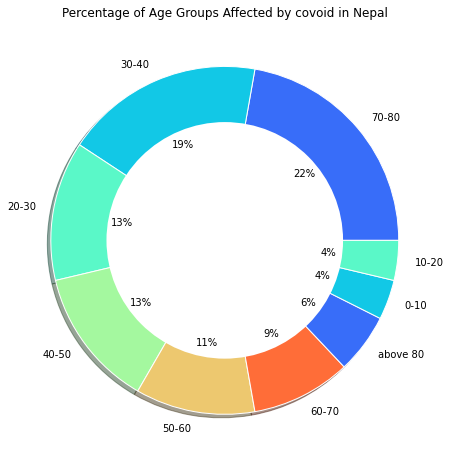

In [236]:
pl.figure(figsize=(10,8))
pl.title('Percentage of Age Groups Affected by covoid in Nepal')
pl.pie(temp,labels=temp.keys(),autopct='%1.00f%%',
       wedgeprops=({'linewidth':1,'edgecolor':'w'}),
       colors=sns.color_palette('rainbow'),shadow=True)
centre_circle = plt.Circle((0,0),0.68,fc='white')
fig = pl.gcf()
fig.gca().add_artist(centre_circle)
pl.show()


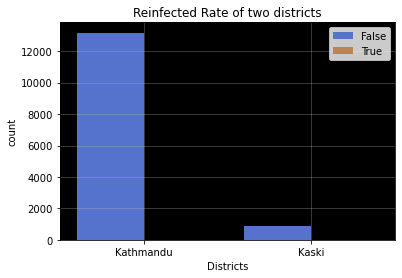

In [256]:
pl.title('Reinfected Rate of two districts')
ax=sns.countplot(data=df,x='Districts',hue='Is Reinfected',palette=['royalblue','peru'])
ax.set_facecolor('k')
ax.legend(loc='upper right')
pl.grid(alpha=.4)
pl.show()

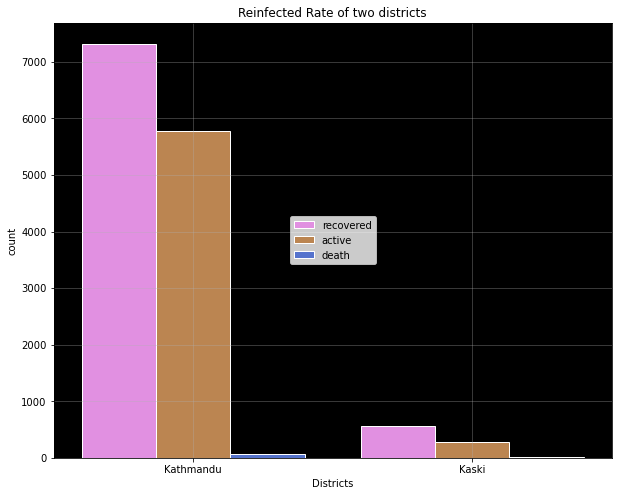

In [285]:
pl.figure(figsize=(10,8))
pl.title('Reinfected Rate of two districts')
ax=sns.countplot(data=df,x='Districts',hue='Current State' ,palette=['violet','peru','royalblue'],
                 
                edgecolor='w',
                linewidth=1)
ax.set_facecolor('k')
ax.legend(loc='center')
pl.grid(alpha=.4)
pl.show()

In [512]:
df.iloc[:,9:].head()

,Age,Source,Type,Bbox/0,Bbox/1,Bbox/2,Bbox/3,Centroid/Coordinates/0,Centroid/Coordinates/1,Municipality,Nationality,point/coordinates/0,point/coordinates/1,Province (District),Ward,Created_month,Modified_month,Recovered_month,AgeGroups
0,32,https://www.mohp.gov.np/eng/,imported,85.188644,27.570449,85.565844,27.817653,85.347351,27.728201,27006,2.0,85.306941,27.695445,3,3716.0,4,4,1,30-40
1,19,https://www.mohp.gov.np/eng/,imported,85.188644,27.570449,85.565844,27.817653,85.347351,27.728201,27006,2.0,85.303927,27.695357,3,3716.0,4,4,4,10-20
2,58,https://www.mohp.gov.np/eng/,imported,85.188644,27.570449,85.565844,27.817653,85.347351,27.728201,27005,2.0,85.370910,27.692810,3,3837.0,4,5,4,50-60
3,81,https://www.mohp.gov.np/eng/,imported,85.188644,27.570449,85.565844,27.817653,85.347351,27.728201,27005,2.0,85.371457,27.692974,3,3837.0,4,4,4,above 80
4,33,https://www.mohp.gov.np/eng/,NaN,85.188644,27.570449,85.565844,27.817653,85.347351,27.728201,27001,NaN,85.356898,27.734822,3,3809.0,5,5,5,30-40


<IPython.core.display.Javascript object>

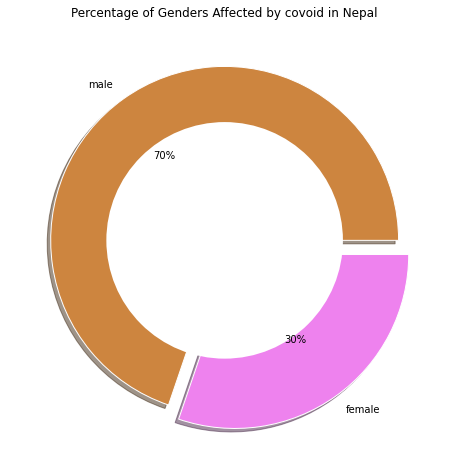

In [299]:

temp=df['Gender'].value_counts()
temp.head()
pl.figure(figsize=(10,8))
pl.title('Percentage of Genders Affected by covoid in Nepal')
pl.pie(temp,labels=temp.keys(),autopct='%1.00f%%',
       wedgeprops=({'linewidth':1,'edgecolor':'w'}),explode=[0,0.1],
       colors=['peru','violet'],shadow=True)
centre_circle = plt.Circle((0,0),0.68,fc='white')
fig = pl.gcf()
fig.gca().add_artist(centre_circle)
pl.show()


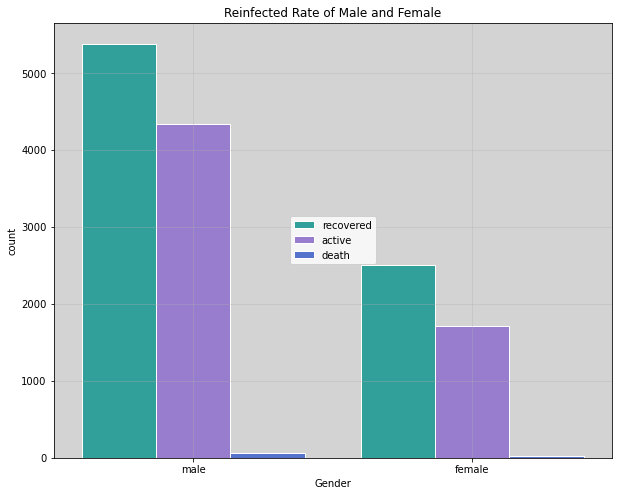

In [315]:
pl.figure(figsize=(10,8))
pl.title('Reinfected Rate of Male and Female')
ax=sns.countplot(data=df,x='Gender',hue='Current State',
                 palette=['lightseagreen','mediumpurple','royalblue'],
                edgecolor='w',
                linewidth=1)
ax.set_facecolor('lightgrey')
ax.legend(loc='center')
pl.grid(alpha=.4)
pl.show()

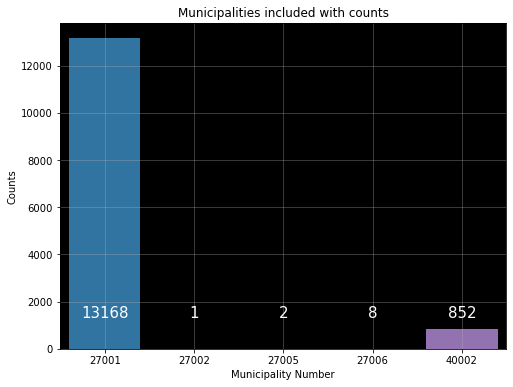

In [370]:
pl.figure(figsize=(8,6))
temp=df['Municipality'].value_counts().reset_index().rename(columns={'index':'Municipality','Municipality':'Counts'})
temp['Municipality']=temp['Municipality'].astype(str)
temp=temp.sort_values('Municipality')
ax=sns.barplot(y='Counts',x='Municipality',data=temp)
for i,j in enumerate(temp['Counts']):
    ax.text(i,1500,j,va='center',ha='center',color='w',size=15)
pl.grid(alpha=.4)
pl.title('Municipalities included with counts')
ax.set_facecolor('k')
pl.xlabel('Municipality Number')
pl.show()

In [513]:
df.head()

,id,Current State,Death On,District,Province,Districts,Is Reinfected,Gender,Reported On,Age,...,Municipality,Nationality,point/coordinates/0,point/coordinates/1,Province (District),Ward,Created_month,Modified_month,Recovered_month,AgeGroups
0,1,recovered,NaT,27,3,Kathmandu,False,male,2020-01-24,32,...,27006,2.0,85.306941,27.695445,3,3716.0,4,4,1,30-40
1,2,recovered,NaT,27,3,Kathmandu,False,female,2020-03-23,19,...,27006,2.0,85.303927,27.695357,3,3716.0,4,4,4,10-20
2,15,active,NaT,27,3,Kathmandu,True,male,2020-04-14,58,...,27005,2.0,85.370910,27.692810,3,3837.0,4,5,4,50-60
3,16,recovered,NaT,27,3,Kathmandu,False,female,2020-04-14,81,...,27005,2.0,85.371457,27.692974,3,3837.0,4,4,4,above 80
4,220,recovered,NaT,27,3,Kathmandu,False,female,2020-05-12,33,...,27001,NaN,85.356898,27.734822,3,3809.0,5,5,5,30-40


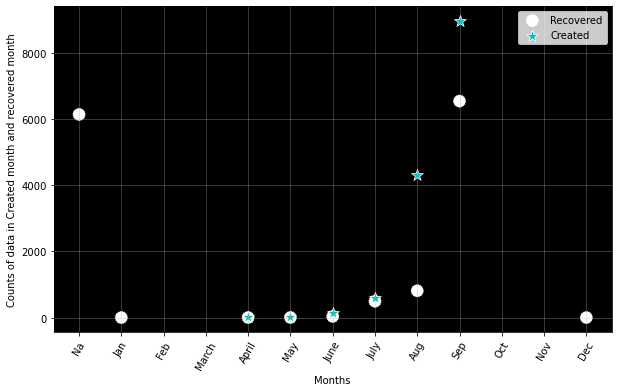

In [492]:
pl.figure(figsize=(10,6))
recovered=df['Recovered_month'].value_counts().reset_index()
created=df['Created_month'].value_counts().reset_index()
recovered.iloc[1,0]=0
recovered.sort_values('index',inplace=True)
created.sort_values('index',inplace=True)
ax=sns.scatterplot(recovered['index'],recovered['Recovered_month'],marker='o',linestyle=':',s=150,color='w',label='Recovered')
sns.scatterplot(created['index'],created['Created_month'],marker='*',s=150,color='c',label='Created')
ax.set_facecolor('k')
pl.xticks(range(13),['Na','Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation=60)
pl.grid(alpha=.4)
pl.xlabel('Months')
pl.ylabel('Counts of data in Created month and recovered month')
pl.show()

,index,Created_month
0,9,8961
1,8,4300
2,7,605
3,6,148
4,5,13
5,4,4


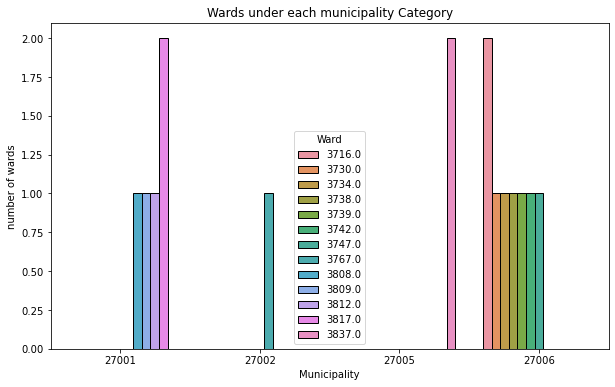

In [511]:
pl.figure(figsize=(10,6))
temp=df.groupby(['Municipality','Ward']).size().reset_index()
temp.drop([3,14],inplace=True)
sns.barplot(data=temp,y=0,x='Municipality',hue='Ward',edgecolor='k')
pl.title('Wards under each municipality Category')
pl.ylabel('number of wards')
pl.show()